In [8]:
import sys,re
import numpy as np
from scipy import stats
import matplotlib as mpl 
import matplotlib.pyplot as plt
# Wrangle the data
import pandas as pd
# Nice figures
import seaborn as sns
# Access data
import os
# Save the results of bootstrapping
import pickle

sns.set_style("whitegrid", rc={'legend.frameon': False})
sns.set_style("ticks", {"xtick.major.size": 20, "ytick.major.size": 20})
sns.set_style("ticks", {"xtick.minor.size": 10, "ytick.minor.size": 10})
# sns.set_style({"xtick.direction": "out","ytick.direction": "out"})

sns.set_context("paper", font_scale=1.4, rc={"lines.linewidth": 5, 'legend.frameon': False})

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

majorLocator = MultipleLocator(4)
majorFormatter = FormatStrFormatter('%d')
minorLocator = MultipleLocator(1)
from matplotlib.ticker import AutoMinorLocator


%matplotlib inline
# LaTeX
mpl.rc('text', usetex=True)
# amsmath for \text{}
# helvetic to for Helvetica font
# sansmath to make math in Helvetica
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{amsmath}',
       r'\usepackage{helvet}',    
       r'\usepackage{sansmath}',
       r'\sansmath',
       r'\renewcommand{\familydefault}{\sfdefault}',
       r'\usepackage[T1]{fontenc}',
       r'\usepackage{graphicx}',
       r'\usepackage{upgreek}',
]

In [9]:
def plot_dG(OAH_experiment=None, OAH_experiment_error=None, OAH_TIP3P=None, OAH_OPC=None, 
            OAMe_experiment=None, OAMe_experiment_error=None, OAMe_TIP3P=None, OAMe_OPC=None,
           OAH_T_err=None, OAH_O_err=None, OAMe_T_err=None, OAMe_O_err=None):
        fig, ax = plt.subplots(1, figsize=(6.5,6), dpi=300)
        plt.subplots_adjust(bottom=0.18, left=0.22, right=0.92)
        clrs = sns.color_palette("Set2", 10)
        ax.errorbar(OAH_experiment, OAH_TIP3P, yerr=OAH_T_err, xerr=OAH_experiment_error,  c='#fa8072', label='OAH, TIP3P',
                                        fmt='s', markersize=8, markeredgecolor='#fa8072', markeredgewidth=1.0, elinewidth=2, 
                    capsize=4, alpha=0.8, mfc='none')
        ax.errorbar(OAH_experiment, OAH_OPC, yerr=OAH_O_err, xerr=OAH_experiment_error,  c='#4169e1', label='OAH, OPC',
                                        fmt='o', markersize=8, markeredgecolor='#4169e1', markeredgewidth=1.0, elinewidth=2, 
                    capsize=4, alpha=0.8, mfc='none')
        ax.errorbar(OAMe_experiment, OAMe_TIP3P, yerr=OAMe_T_err, xerr=OAMe_experiment_error, c='#fa8072',  label='OAMe, TIP3P',
                                        fmt='s', markersize=8, markeredgecolor='#fa8072', markeredgewidth=1.0, elinewidth=2, 
                    capsize=4, alpha=0.8, mfc='none')

        ax.errorbar(OAMe_experiment, OAMe_OPC, yerr=OAMe_O_err, xerr=OAMe_experiment_error, c='#4169e1', label='OAMe, OPC',
                                        fmt='o', markersize=8, markeredgecolor='#4169e1', markeredgewidth=1.0, elinewidth=2, 
                    capsize=4, alpha=0.8, mfc='none')
        
        data_combined = np.concatenate((OAH_experiment,OAMe_experiment))
        print(data_combined)
        TIP3P_combined =  np.concatenate((OAH_TIP3P,OAMe_TIP3P))
        print(TIP3P_combined)
        OPC_combined =  np.concatenate((OAH_OPC,OAMe_OPC))
        print(OPC_combined)
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_combined, TIP3P_combined) 
        print(slope)
        print(intercept)
        ax.plot([i for i in np.arange(-20,20)], [slope*i+intercept for i in np.arange(-20,20)], ls='--', c='#fa8072', lw=1, alpha=1)
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_combined, OPC_combined)
        print(slope)
        print(intercept)
        ax.plot([i for i in np.arange(-20,20)], [slope*i+intercept for i in np.arange(-20,20)], ls='--', c='#4169e1', lw=1, alpha=1)
   
        # Get handles
        handles, labels = ax.get_legend_handles_labels()
        # remove the errorbars
        handles = [h[0] for h in handles]
        # use them in the legend
        ax.legend(handles, labels, loc='upper left',numpoints=1)

        ax.set_xlabel('$\\mathsf{\\Delta} G_\\text{experiment}$ (kcal/mol)', labelpad = 5)
        ax.set_ylabel('$\\mathsf{\\Delta} G_\\text{calculated}$ (kcal/mol)', labelpad = 5)
        ax.set_xlim([-14, -2])
        ax.set_ylim([-14, -2])
        ax.plot([-50,50], [-50,50], ls="-", c=".3", zorder=-1, lw='0.5')
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#         ax.set_title(strings[methods.index(i)])
        plt.tick_params(which='major', direction='inout', length=10)
        plt.tick_params(which='minor', direction='in', length=5)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        plt.savefig('OAH-OAMe-dG.pdf', dpi=300,  pad_inches=0.0)

In [10]:
def plot_dH(OAH_experiment=None, OAH_experiment_error=None, OAH_TIP3P=None, OAH_OPC=None, 
            OAMe_experiment=None, OAMe_experiment_error=None, OAMe_TIP3P=None, OAMe_OPC=None,
           OAH_T_err=None, OAH_O_err=None, OAMe_T_err=None, OAMe_O_err=None):
        fig, ax = plt.subplots(1, figsize=(6.5,6), dpi=300)
        plt.subplots_adjust(bottom=0.18, left=0.22, right=0.92)
        clrs = sns.color_palette("Set2", 10)
        ax.errorbar(OAH_experiment, OAH_TIP3P, yerr=OAH_T_err, xerr=OAH_experiment_error,  c='#fa8072', label='OAH, TIP3P',
                                                            fmt='s', markersize=8, markeredgecolor='#fa8072', markeredgewidth=1.0, elinewidth=2, 
                    capsize=4, alpha=0.8, mfc='none')
        ax.errorbar(OAH_experiment, OAH_OPC, yerr=OAH_O_err, xerr=OAH_experiment_error,  c='#4169e1', label='OAH, OPC',
                                        fmt='o', markersize=8, markeredgecolor='#4169e1', markeredgewidth=1.0, elinewidth=2, 
                    capsize=4, alpha=0.8, mfc='none')
        ax.errorbar(OAMe_experiment, OAMe_TIP3P, yerr=OAMe_T_err, xerr=OAMe_experiment_error,  c='#fa8072',  label='OAMe, TIP3P',
                                        fmt='s', markersize=8, markeredgecolor='#fa8072', markeredgewidth=1.0, elinewidth=2, 
                    capsize=4, alpha=0.8, mfc='none')

        ax.errorbar(OAMe_experiment, OAMe_OPC, yerr=OAMe_O_err, xerr=OAMe_experiment_error, c='#4169e1', label='OAMe, OPC',
                                        fmt='o', markersize=8, markeredgecolor='#4169e1', markeredgewidth=1.0, elinewidth=2, 
                    capsize=4, alpha=0.8, mfc='none')
        
        mask = ~np.isnan(OAMe_experiment)
        data_combined = np.concatenate((OAH_experiment,OAMe_experiment[mask]))
        TIP3P_combined =  np.concatenate((OAH_TIP3P,OAMe_TIP3P[mask]))
        OPC_combined =  np.concatenate((OAH_OPC,OAMe_OPC[mask]))
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_combined, TIP3P_combined) 
        ax.plot([i for i in np.arange(-20,20)], [slope*i+intercept for i in np.arange(-20,20)], ls='--', c='#fa8072', lw=1, alpha=1)
        print(slope)
        print(intercept)
        slope, intercept, r_value, p_value, std_err = stats.linregress(data_combined, OPC_combined)
        ax.plot([i for i in np.arange(-20,20)], [slope*i+intercept for i in np.arange(-20,20)], ls='--', c='#4169e1', lw=1, alpha=1)
        
        # Get handles
        handles, labels = ax.get_legend_handles_labels()
        # remove the errorbars
        handles = [h[0] for h in handles]
        # use them in the legend
        ax.legend(handles, labels, loc='upper left',numpoints=1)

        ax.set_xlabel('$\\mathsf{\\Delta} H_\\text{experiment}$ (kcal/mol)', labelpad = 5)
        ax.set_ylabel('$\\mathsf{\\Delta} H_\\text{calculated}$ (kcal/mol)', labelpad = 5)
        ax.set_xlim([-16, 0])
        ax.set_ylim([-16, 0])
        ax.plot([-50,50], [-50,50], ls="-", c=".3", zorder=-1, lw='0.5')
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#         ax.set_title(strings[methods.index(i)])
        plt.tick_params(which='major', direction='inout', length=10)
        plt.tick_params(which='minor', direction='in', length=5)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        plt.savefig('OAH-OAMe-dH.pdf', dpi=300,  pad_inches=0.0)

In [36]:
def plot_TS(OAH_experiment_dH, OAH_experiment_TS, OAH_experiment_dH_error, OAH_experiment_TS_error,
           OAH_TIP3P_dH, OAH_TIP3P_TS, OAH_TIP3P_dH_error, OAH_TIP3P_TS_error,
           OAMe_TIP3P_dH, OAMe_TIP3P_TS, OAMe_TIP3P_dH_error, OAMe_TIP3P_TS_error,
           OAH_OPC_dH, OAH_OPC_TS, OAH_OPC_dH_error, OAH_OPC_TS_error,
           OAMe_OPC_dH, OAMe_OPC_TS, OAMe_OPC_dH_error, OAMe_OPC_TS_error):
        fig, ax = plt.subplots(1, figsize=(6.5,6), dpi=300)
        plt.subplots_adjust(bottom=0.18, left=0.22, right=0.92)
        clrs = sns.color_palette("Set2", 10)
        
        # Plot the trend lines...
        exp_dH_combined = np.concatenate((OAH_experiment_dH[~np.isnan(OAH_experiment_dH)], 
                                          OAMe_experiment_dH[~np.isnan(OAMe_experiment_dH)]))
        exp_TS_combined = np.concatenate((OAH_experiment_TS[~np.isnan(OAH_experiment_TS)], 
                                          OAMe_experiment_TS[~np.isnan(OAMe_experiment_TS)]))
        
        print(exp_dH_combined)
        print(exp_TS_combined)
        
        T_dH_combined = np.concatenate((OAH_TIP3P_dH[~np.isnan(OAH_TIP3P_dH)],  OAMe_TIP3P_dH[~np.isnan(OAMe_TIP3P_dH)]))
        T_TS_combined = np.concatenate((OAH_TIP3P_TS[~np.isnan(OAH_TIP3P_TS)],  OAMe_TIP3P_TS[~np.isnan(OAMe_TIP3P_TS)]))
        O_dH_combined = np.concatenate((OAH_OPC_dH[~np.isnan(OAH_OPC_dH)],  OAMe_OPC_dH[~np.isnan(OAMe_OPC_dH)]))
        O_TS_combined = np.concatenate((OAH_OPC_TS[~np.isnan(OAH_OPC_TS)],  OAMe_OPC_TS[~np.isnan(OAMe_OPC_TS)]))

        exp_slope, intercept, exp_r_value, p_value, std_err = stats.linregress(exp_TS_combined, exp_dH_combined) 
        ax.plot([i for i in np.arange(-20,20)], [exp_slope*i+intercept for i in np.arange(-20,20)], ls='--', c=clrs[4], lw=1, alpha=1)
        
        T_slope, intercept, T_r_value, p_value, std_err = stats.linregress(T_TS_combined, T_dH_combined) 
        ax.plot([i for i in np.arange(-20,20)], [T_slope*i+intercept for i in np.arange(-20,20)], ls='--', c='#fa8072', lw=1, alpha=1)
        
        O_slope, intercept, O_r_value, p_value, std_err = stats.linregress(O_TS_combined, O_dH_combined) 
        ax.plot([i for i in np.arange(-20,20)], [O_slope*i+intercept for i in np.arange(-20,20)], ls='--', c='#4169e1', lw=1, alpha=1)

        
        mask = ~np.isnan(OAH_experiment_TS) & ~np.isnan(OAH_experiment_dH)
        ax.errorbar(OAH_experiment_TS[mask], OAH_experiment_dH[mask], yerr=OAH_experiment_dH_error[mask], xerr=OAH_experiment_TS_error[mask],
                    c=clrs[4], mfc='none', label='Exp, slope = {0:.2f}, R$^2$ = {1:.2f}'.format(exp_slope, exp_r_value**2),
                    fmt='D', markersize=8, markeredgecolor=clrs[4], markeredgewidth=1.0, elinewidth=2, capsize=4, alpha=0.8, )
        
        mask = ~np.isnan(OAMe_experiment_TS) & ~np.isnan(OAMe_experiment_dH)
        ax.errorbar(OAMe_experiment_TS[mask], OAMe_experiment_dH[mask], yerr=OAMe_experiment_dH_error[mask], xerr=OAMe_experiment_TS_error[mask],
                    c=clrs[4], mfc='none',
                    fmt='D', markersize=8, markeredgecolor=clrs[4], markeredgewidth=1.0, elinewidth=2, capsize=4, alpha=0.8, )
       
        mask = ~np.isnan(OAH_TIP3P_TS) & ~np.isnan(OAH_TIP3P_dH)
        ax.errorbar(OAH_TIP3P_TS[mask], OAH_TIP3P_dH[mask], yerr=OAH_TIP3P_dH_error[mask], xerr=OAH_TIP3P_TS_error[mask],
                    c='#fa8072', mfc='none', label='TIP3P, slope = {0:.2f}, R$^2$ = {1:.2f}'.format(T_slope, T_r_value**2),
                    fmt='s', markersize=8, markeredgecolor='#fa8072', markeredgewidth=1.0, elinewidth=2, capsize=4, alpha=0.8, )
        mask = ~np.isnan(OAMe_TIP3P_TS) & ~np.isnan(OAMe_TIP3P_dH)
        ax.errorbar(OAMe_TIP3P_TS[mask], OAMe_TIP3P_dH[mask], yerr=OAMe_TIP3P_dH_error[mask], xerr=OAMe_TIP3P_TS_error[mask],
                    c='#fa8072', mfc='none',
                    fmt='s', markersize=8, markeredgecolor='#fa8072', markeredgewidth=1.0, elinewidth=2, capsize=4, alpha=0.8, )
        mask = ~np.isnan(OAH_OPC_TS) & ~np.isnan(OAH_OPC_dH)
        ax.errorbar(OAH_OPC_TS[mask], OAH_OPC_dH[mask], yerr=OAH_OPC_dH_error[mask], xerr=OAH_OPC_TS_error[mask],
                    c='#4169e1', mfc='none', label='OPC, slope = {0:.2f}, R$^2$ = {1:.2f}'.format(O_slope, O_r_value**2),
                    fmt='o', markersize=8, markeredgecolor='#4169e1', markeredgewidth=1.0, elinewidth=2, capsize=4, alpha=0.8, )
        mask = ~np.isnan(OAMe_OPC_TS) & ~np.isnan(OAMe_OPC_dH)
        ax.errorbar(OAMe_OPC_TS[mask], OAMe_OPC_dH[mask], yerr=OAMe_OPC_dH_error[mask], xerr=OAMe_OPC_TS_error[mask],
                    c='#4169e1', mfc='none',
                    fmt='o', markersize=8, markeredgecolor='#4169e1', markeredgewidth=1.0, elinewidth=2, capsize=4, alpha=0.8, )
        # This one needs a white background...
        bbox_props = dict(boxstyle="square,pad=-0.05", fc="white", ec=None, lw=0, alpha=0.5)
        ax.annotate('OAMe-G4 (TIP3P)', xy=(OAMe_TIP3P_TS[3], OAMe_TIP3P_dH[3]), xycoords='data', xytext=(-25, -15), 
                   textcoords='offset points', bbox=bbox_props)
        # This one needs an arrow...
        ax.annotate('OAMe-G4 (OPC)', xy=(OAMe_OPC_TS[3], OAMe_OPC_dH[3]), xycoords='data', xytext=(45, 15), 
                   textcoords='offset points', arrowprops=dict(arrowstyle='-|>', linewidth=1,
                                                               shrinkB=5,
                                                               connectionstyle='arc3,rad=0.3',
                                                               facecolor='#4169e1',
                                                               edgecolor='#4169e1',
                                                               relpos=(0.4,0)))
        
        ax.annotate('OAH-G4 (TIP3P)', xy=(OAH_TIP3P_TS[3], OAH_TIP3P_dH[3]), xycoords='data', xytext=(-20, -15), 
                   textcoords='offset points')
        ax.annotate('OAH-G4 (OPC)', xy=(OAH_OPC_TS[3], OAH_OPC_dH[3]), xycoords='data', xytext=(-20, -15), 
                   textcoords='offset points')
        
        ax.annotate('OAH-G4 (Exp)', xy=(OAH_experiment_TS[3], OAH_experiment_dH[3]), xycoords='data', xytext=(-20, -15), 
                   textcoords='offset points')


        
        # Get handles
        handles, labels = ax.get_legend_handles_labels()
        # remove the errorbars
        handles = [h[0] for h in handles]
        # use them in the legend
        ax.legend(handles, labels, loc='upper right',numpoints=1)

        ax.set_xlabel('$-T\\mathsf{\\Delta} S$ (kcal/mol)', labelpad = 5)
        ax.set_ylabel('$\\mathsf{\\Delta} H$ (kcal/mol)', labelpad = 5)
        ax.set_xlim([-8, 12])
        ax.set_ylim([-18, 0])
        ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
        ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
#         ax.set_title(strings[methods.index(i)])
        plt.tick_params(which='major', direction='inout', length=10)
        plt.tick_params(which='minor', direction='in', length=5)
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        plt.savefig('OAH-OAMe-TS.pdf', dpi=300,  pad_inches=0.0)

In [37]:
OAH_experiment = "-5.04 -4.25 -5.06 -9.37 -4.50 -5.33"
OAH_experiment = np.fromstring(OAH_experiment, dtype=float, sep=" ")
OAH_experiment_error = "0.01 0.01 0.01 0.002 0.001 0.004"
OAH_experiment_error = np.fromstring(OAH_experiment_error, dtype=float, sep=" ")

In [38]:
OAMe_experiment = "-5.24 -5.04 -5.94 -2.38 -3.90 -4.52"
OAMe_experiment = np.fromstring(OAMe_experiment, dtype=float, sep=" ")
OAMe_experiment_error = "0.05 0.03 0.12 0.02 0.02 0.02"
OAMe_experiment_error = np.fromstring(OAMe_experiment_error, dtype=float, sep=" ")

In [39]:
OAH_APR_T_dG = "-6.50 -5.42 -6.82 -12.34 -4.46 -6.46"
OAH_APR_T_dG_error = "0.23 0.22 0.23 0.23 0.45 0.23"
OAH_APR_O_dG = "-6.09 -5.16 -7.79 -11.35 -6.42 -6.41"
OAH_APR_O_dG_error = "0.28 0.23 0.24 0.29 0.25 0.32"

OAMe_APR_T_dG = "-7.61 -6.99 -7.34 -4.35 -5.30 -6.02"
OAMe_APR_T_dG_error = "0.21 0.30 0.22 0.28 0.22 0.21"
OAMe_APR_O_dG = "-7.88 -6.97 -8.82 -5.67 -6.64 -7.04"
OAMe_APR_O_dG_error = "0.24 0.33 0.24 0.32 0.24 0.25"

OAH_APR_T_dG = np.fromstring(OAH_APR_T_dG, dtype=float, sep=" ")
OAH_APR_T_dG_error = np.fromstring(OAH_APR_T_dG_error, dtype=float, sep=" ")
OAH_APR_O_dG = np.fromstring(OAH_APR_O_dG, dtype=float, sep=" ")
OAH_APR_O_dG_error = np.fromstring(OAH_APR_O_dG_error, dtype=float, sep=" ")
OAMe_APR_T_dG = np.fromstring(OAMe_APR_T_dG, dtype=float, sep=" ")
OAMe_APR_T_dG_error = np.fromstring(OAMe_APR_T_dG_error, dtype=float, sep=" ")
OAMe_APR_O_dG = np.fromstring(OAMe_APR_O_dG, dtype=float, sep=" ")
OAMe_APR_O_dG_error = np.fromstring(OAMe_APR_O_dG_error, dtype=float, sep=" ")

[-5.04 -4.25 -5.06 -9.37 -4.5  -5.33 -5.24 -5.04 -5.94 -2.38 -3.9  -4.52]
[ -6.5   -5.42  -6.82 -12.34  -4.46  -6.46  -7.61  -6.99  -7.34  -4.35
  -5.3   -6.02]
[ -6.09  -5.16  -7.79 -11.35  -6.42  -6.41  -7.88  -6.97  -8.82  -5.67
  -6.64  -7.04]
1.21526790515
-0.500101915406
0.894938367752
-2.66946525544


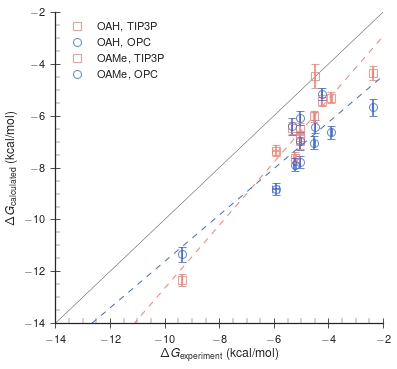

In [40]:
plot_dG(OAH_experiment, OAH_experiment_error, OAH_APR_T_dG, OAH_APR_O_dG, OAMe_experiment, OAMe_experiment_error, OAMe_APR_T_dG, OAMe_APR_O_dG,
       OAH_APR_T_dG_error, OAH_APR_O_dG_error, OAMe_APR_T_dG_error, OAMe_APR_O_dG_error)

In [41]:
OAH_experiment = "-7.69 -4.39 -5.93 -14.80 -9.90 -5.67"
OAH_experiment = np.fromstring(OAH_experiment, dtype=float, sep=" ")
OAH_experiment_error = "0.01 0.03 0.08 0.01 0.05 0.01"
OAH_experiment_error = np.fromstring(OAH_experiment_error, dtype=float, sep=" ")

OAMe_experiment = "-9.96 -7.56 -6.62 nan nan -9.05"
OAMe_experiment = np.fromstring(OAMe_experiment, dtype=float, sep=" ")
OAMe_experiment_error = "0.01 0.10 0.18 nan nan 0.13"
OAMe_experiment_error = np.fromstring(OAMe_experiment_error, dtype=float, sep=" ")

OAH_APR_T_dH = "-8.36 -5.71 -7.16 -15.46 -5.57 -9.50"
OAH_APR_T_dH_error = "0.37 0.29 0.38 0.38 0.35 0.35"
OAH_APR_O_dH = "-4.28 -1.83 -4.01 -9.22 -5.60 -6.82"
OAH_APR_O_dH_error = "0.38 0.41 0.41 0.36 0.39 0.55"

OAMe_APR_T_dH = "-11.73 -10.67 -9.46 -13.68 -6.87 -11.03"
OAMe_APR_T_dH_error = "0.38 0.33 0.42 0.34 1.03 0.37"
OAMe_APR_O_dH = "-7.79 -6.72 -6.94 -5.71 -7.17 -7.25"
OAMe_APR_O_dH_error = "0.43 0.39 0.32 0.42 0.45 0.44"

OAH_APR_T_dH = np.fromstring(OAH_APR_T_dH, dtype=float, sep=" ")
OAH_APR_T_dH_error = np.fromstring(OAH_APR_T_dH_error, dtype=float, sep=" ")
OAH_APR_O_dH = np.fromstring(OAH_APR_O_dH, dtype=float, sep=" ")
OAH_APR_O_dH_error = np.fromstring(OAH_APR_O_dH_error, dtype=float, sep=" ")
OAMe_APR_T_dH = np.fromstring(OAMe_APR_T_dH, dtype=float, sep=" ")
OAMe_APR_T_dH_error = np.fromstring(OAMe_APR_T_dH_error, dtype=float, sep=" ")
OAMe_APR_O_dH = np.fromstring(OAMe_APR_O_dH, dtype=float, sep=" ")
OAMe_APR_O_dH_error = np.fromstring(OAMe_APR_O_dH_error, dtype=float, sep=" ")

0.723543581195
-3.5630550082


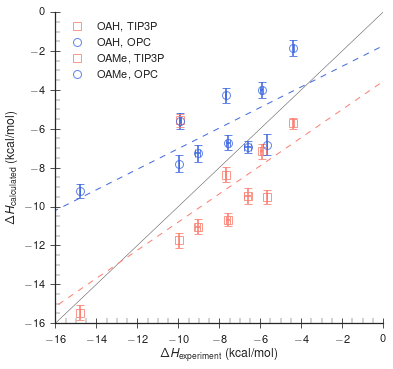

In [42]:
plot_dH(OAH_experiment, OAH_experiment_error, OAH_APR_T_dH, OAH_APR_O_dH, OAMe_experiment, OAMe_experiment_error,
        OAMe_APR_T_dH, OAMe_APR_O_dH,
       OAH_APR_T_dH_error, OAH_APR_O_dH_error, OAMe_APR_T_dH_error, OAMe_APR_O_dH_error)

In [43]:
OAH_experiment_dH = "-7.69 -4.39 -5.93 -14.80 -9.90 -5.67"
OAH_experiment_dH = np.fromstring(OAH_experiment_dH, dtype=float, sep=" ")
OAH_experiment_dH_error = "0.01 0.03 0.08 0.01 0.05 0.01"
OAH_experiment_dH_error = np.fromstring(OAH_experiment_dH_error, dtype=float, sep=" ")

OAMe_experiment_dH = "-9.96 -7.56 -6.62 nan nan -9.05"
OAMe_experiment_dH = np.fromstring(OAMe_experiment_dH, dtype=float, sep=" ")
OAMe_experiment_dH_error = "0.01 0.10 0.18 nan nan 0.13"
OAMe_experiment_dH_error = np.fromstring(OAMe_experiment_dH_error, dtype=float, sep=" ")

OAH_experiment_TS = "2.64 0.15 0.87 5.43 5.40 0.34"
OAH_experiment_TS = np.fromstring(OAH_experiment_TS, dtype=float, sep=" ")
OAH_experiment_TS_error = "0.01 0.03 0.08 0.01 0.05 0.01"
OAH_experiment_TS_error = np.fromstring(OAH_experiment_TS_error, dtype=float, sep=" ")

OAMe_experiment_TS = "4.72 2.52 0.68 nan nan 4.54"
OAMe_experiment_TS = np.fromstring(OAMe_experiment_TS, dtype=float, sep=" ")
OAMe_experiment_TS_error = "0.05 0.11 0.22 nan nan 0.13"
OAMe_experiment_TS_error = np.fromstring(OAMe_experiment_TS_error, dtype=float, sep=" ")

OAH_APR_T_TS = "1.86 0.29 0.34 3.12 1.11 3.04"
OAH_APR_T_TS_error = "0.44 0.36 0.44 0.44 0.57 0.42"
OAH_APR_O_TS = "-1.81 -3.33 -3.78 -2.13 -0.82 0.41"
OAH_APR_O_TS_error = "0.47 0.47 0.48 0.46 0.46 0.64"

OAMe_APR_T_TS = "4.12 3.68 2.12 9.33 1.57 5.01"
OAMe_APR_T_TS_error = "0.43 0.45 0.47 0.44 1.05 0.43"
OAMe_APR_O_TS = "-0.09 -0.25 -1.88 0.04 0.53 0.21"
OAMe_APR_O_TS_error = "0.49 0.51 0.40 0.53 0.51 0.51"

OAH_APR_T_TS = np.fromstring(OAH_APR_T_TS, dtype=float, sep=" ")
OAH_APR_T_TS_error = np.fromstring(OAH_APR_T_TS_error, dtype=float, sep=" ")
OAH_APR_O_TS = np.fromstring(OAH_APR_O_TS, dtype=float, sep=" ")
OAH_APR_O_TS_error = np.fromstring(OAH_APR_O_TS_error, dtype=float, sep=" ")
OAMe_APR_T_TS = np.fromstring(OAMe_APR_T_TS, dtype=float, sep=" ")
OAMe_APR_T_TS_error = np.fromstring(OAMe_APR_T_TS_error, dtype=float, sep=" ")
OAMe_APR_O_TS = np.fromstring(OAMe_APR_O_TS, dtype=float, sep=" ")
OAMe_APR_O_TS_error = np.fromstring(OAMe_APR_O_TS_error, dtype=float, sep=" ")

[ -7.69  -4.39  -5.93 -14.8   -9.9   -5.67  -9.96  -7.56  -6.62  -9.05]
[ 2.64  0.15  0.87  5.43  5.4   0.34  4.72  2.52  0.68  4.54]


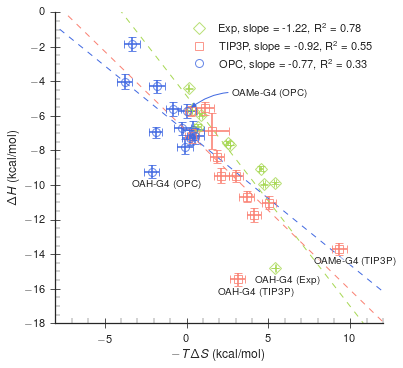

In [44]:
plot_TS(OAH_experiment_dH, OAH_experiment_TS, OAH_experiment_dH_error, OAH_experiment_TS_error,
           OAH_APR_T_dH, OAH_APR_T_TS, OAH_APR_T_dH_error, OAH_APR_T_TS_error,
           OAMe_APR_T_dH, OAMe_APR_T_TS, OAMe_APR_T_dH_error, OAMe_APR_T_TS_error,
           OAH_APR_O_dH, OAH_APR_O_TS, OAH_APR_O_dH_error, OAH_APR_O_TS_error,
           OAMe_APR_O_dH, OAMe_APR_O_TS, OAMe_APR_O_dH_error, OAMe_APR_O_TS_error)